In [102]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.metrics import mean_squared_error, r2_score

In [103]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\uber-raw-data-apr14.csv")

In [104]:
df.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [106]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.head(5)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [107]:
df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.day
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek
df['Month'] = df['Date/Time'].dt.month

In [108]:
df

,Date/Time,Lat,Lon,Base,Hour,Day,DayOfWeek,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,1,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,1,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,1,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,1,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,1,4
...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,23,30,2,4
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,23,30,2,4
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,23,30,2,4
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,23,30,2,4


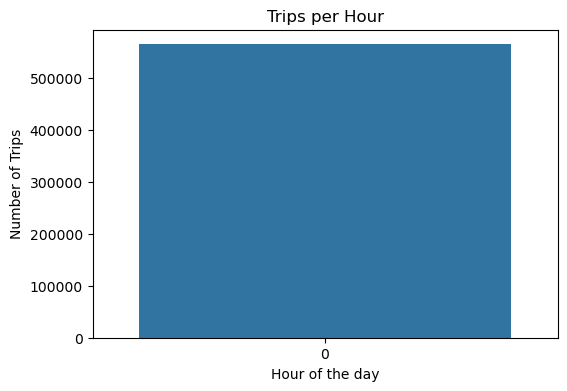

In [109]:
# EDA

plt.figure(figsize =(6,4))
sns.countplot(df['Hour'])
plt.title('Trips per Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Trips')
plt.show()

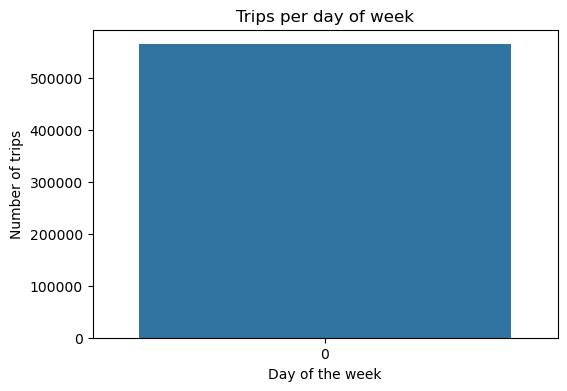

In [110]:
plt.figure(figsize=(6,4))
sns.countplot(df['DayOfWeek'])
plt.title('Trips per day of week')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.show()

In [111]:

df_aggregated = df.groupby(['Hour', 'Day', 'DayOfWeek', 'Month']).size().reset_index(name='Trips')
X = df_aggregated[['Hour', 'Day', 'DayOfWeek', 'Month']]
y = df_aggregated['Trips']
df_aggregated

,Hour,Day,DayOfWeek,Month,Trips
0,0,1,1,4,138
1,0,2,2,4,161
2,0,3,3,4,194
3,0,4,4,4,329
4,0,5,5,4,723
...,...,...,...,...,...
715,23,26,5,4,1708
716,23,27,6,4,300
717,23,28,0,4,305
718,23,29,1,4,456


In [112]:
df= pd.get_dummies(df, columns =['Base'], drop_first = True)
df

,Date/Time,Lat,Lon,Hour,Day,DayOfWeek,Month,Base_B02598,Base_B02617,Base_B02682,Base_B02764
0,2014-04-01 00:11:00,40.7690,-73.9549,0,1,1,4,False,False,False,False
1,2014-04-01 00:17:00,40.7267,-74.0345,0,1,1,4,False,False,False,False
2,2014-04-01 00:21:00,40.7316,-73.9873,0,1,1,4,False,False,False,False
3,2014-04-01 00:28:00,40.7588,-73.9776,0,1,1,4,False,False,False,False
4,2014-04-01 00:33:00,40.7594,-73.9722,0,1,1,4,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,23,30,2,4,False,False,False,True
564512,2014-04-30 23:26:00,40.7629,-73.9672,23,30,2,4,False,False,False,True
564513,2014-04-30 23:31:00,40.7443,-73.9889,23,30,2,4,False,False,False,True
564514,2014-04-30 23:32:00,40.6756,-73.9405,23,30,2,4,False,False,False,True


In [114]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state= 42)

In [115]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
y_pred = rfr.predict(X_test)


In [118]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 22000.961273148147
R^2 Score: 0.9149492184852315


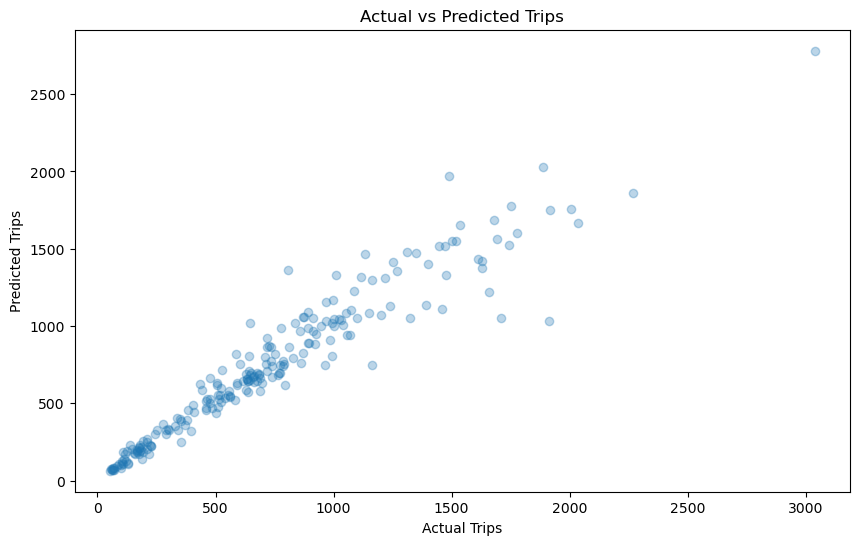

In [119]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()